In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from statsmodels.stats import weightstats as stests

### Loading Dataset

In [2]:
data=pd.read_csv('loan_eligibility.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


### check data types of the dataset

In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
data=data.drop('Loan_ID',axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


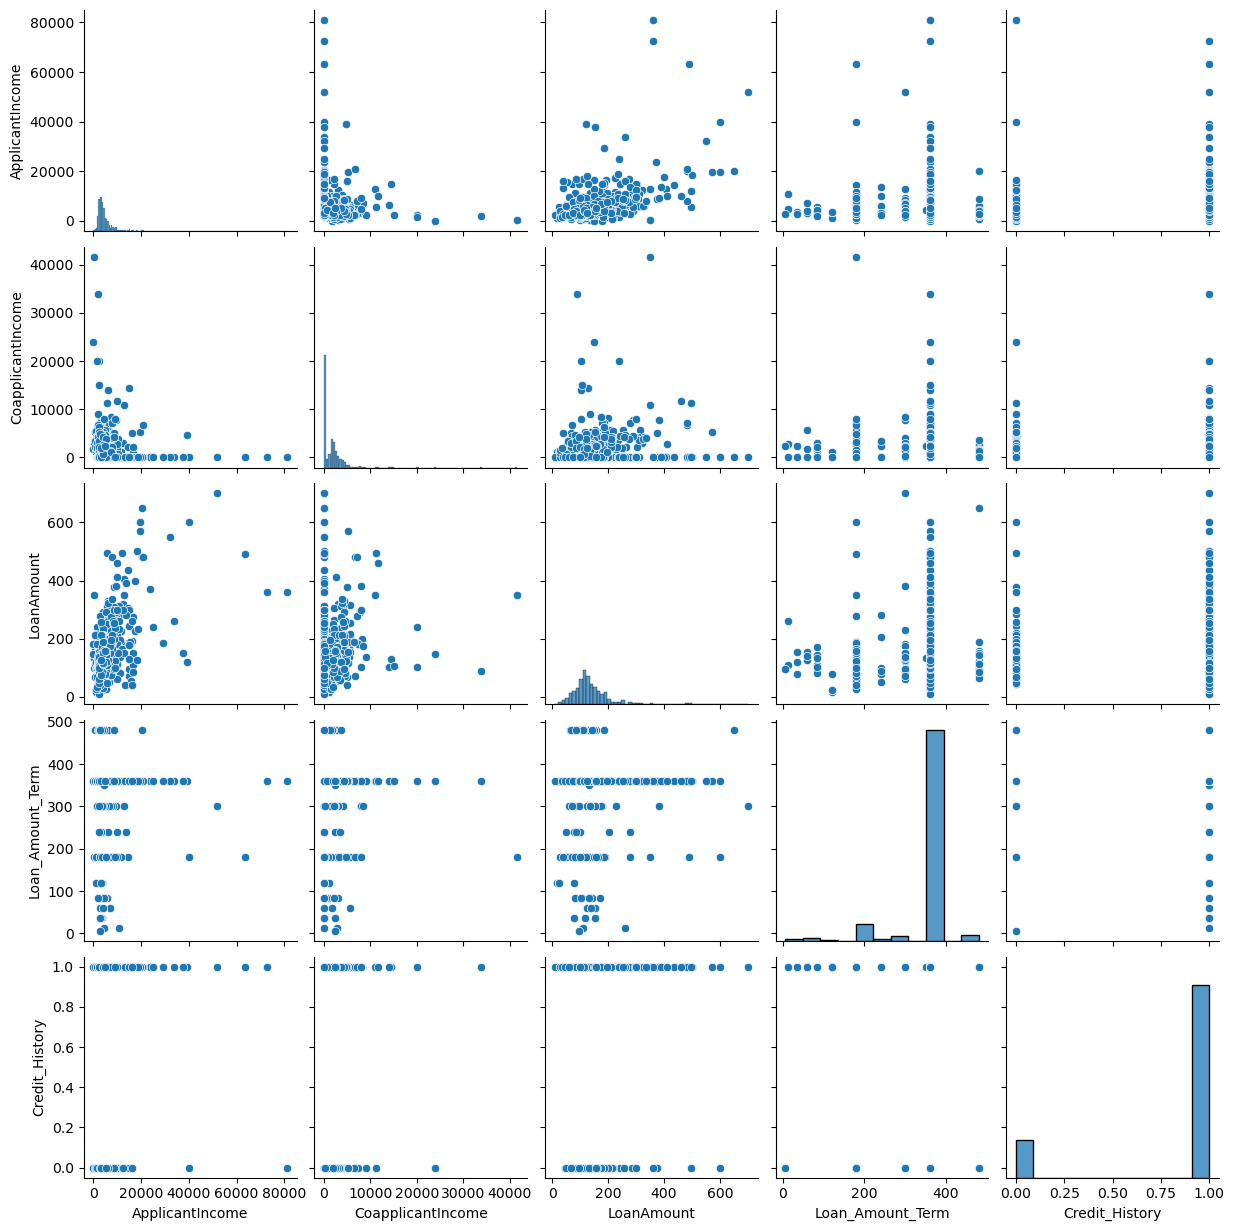

In [5]:
sns.pairplot(data)

### Univariate Analysis
##### This analysis aims to understand each variable separately, looking at its distribution, range of values, central tendency, etc.

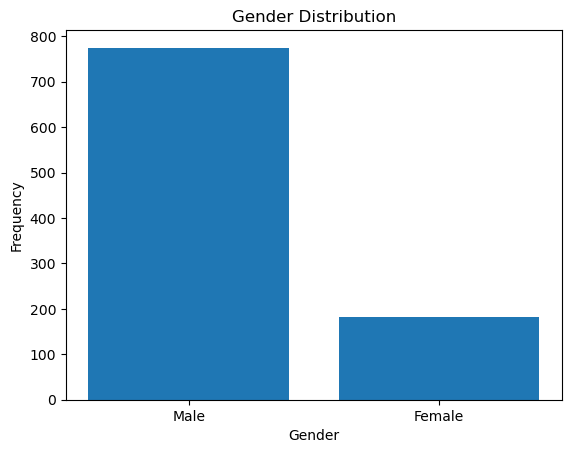

In [6]:
gender_counts = data['Gender'].value_counts()

# Plotting a bar chart for 'Gender'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Create a bar plot
ax.bar(gender_counts.index, gender_counts.values)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

######  80% of applicants are men;

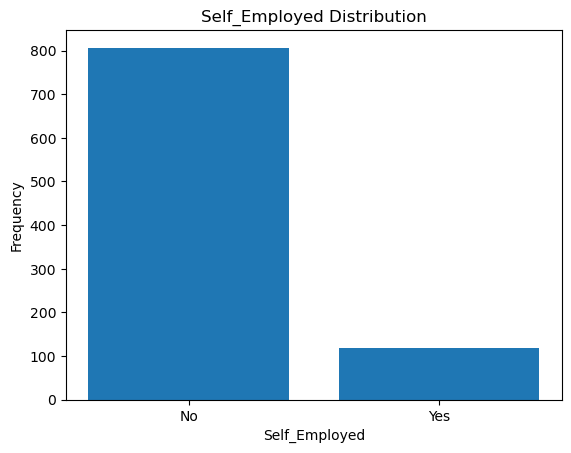

In [7]:
gender_counts = data['Self_Employed'].value_counts()

# Plotting a bar chart for 'Gender'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Create a bar plot
ax.bar(gender_counts.index, gender_counts.values)

plt.title('Self_Employed Distribution')
plt.xlabel('Self_Employed')
plt.ylabel('Frequency')
plt.show()

##### near 80% are self-employed;

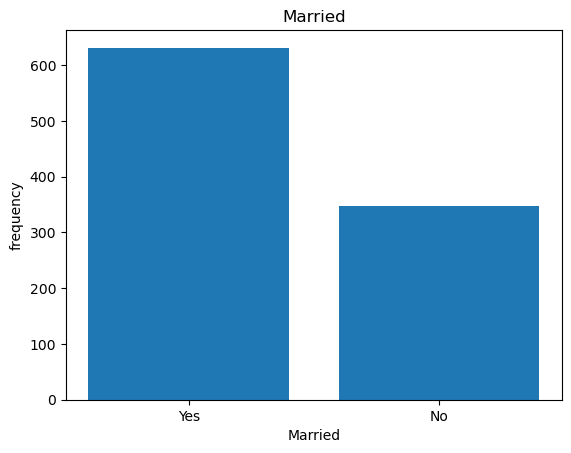

In [8]:
gender_counts = data['Married'].value_counts()

# Plotting a bar chart for 'Gender'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Create a bar plot
ax.bar(gender_counts.index, gender_counts.values)
plt.title('Married')
plt.xlabel('Married')
plt.ylabel('frequency')
plt.show()

##### 65% are married;

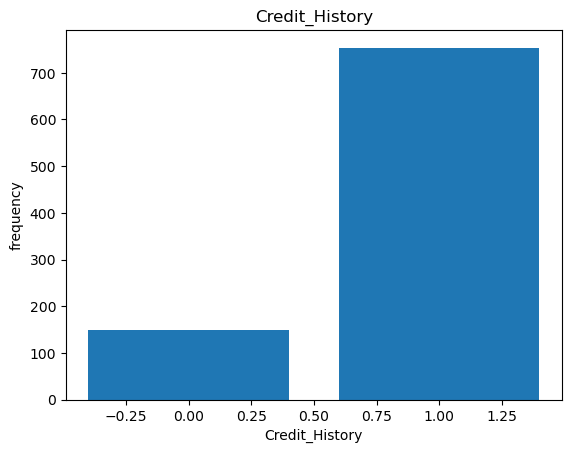

In [9]:
gender_counts = data['Credit_History'].value_counts()

# Plotting a bar chart for 'Gender'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Create a bar plot
ax.bar(gender_counts.index, gender_counts.values)
plt.title('Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('frequency')
plt.show()

#### 84% repaid his debts.

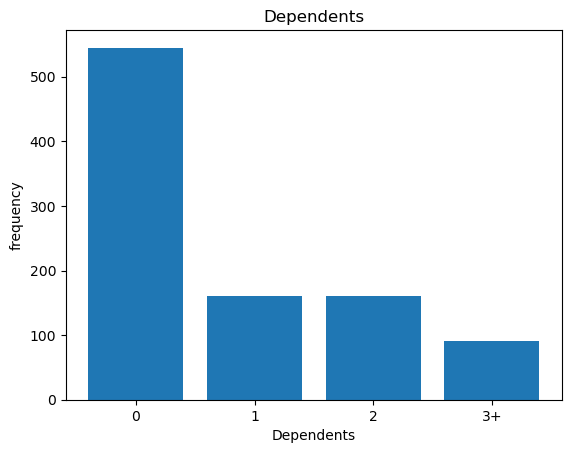

In [10]:
gender_counts = data['Dependents'].value_counts()

# Plotting a bar chart for 'Gender'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Create a bar plot
ax.bar(gender_counts.index, gender_counts.values)
plt.title('Dependents')
plt.xlabel('Dependents')
plt.ylabel('frequency')
plt.show()

#### 57% of the applicants have no dependents;

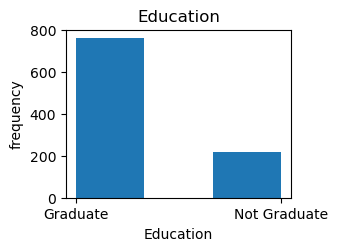

In [11]:
fig=plt.figure()
ax=fig.add_subplot(2,2,2)
ax.hist(data['Education'], bins=3)
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('frequency')
plt.show()

#### 78% of the applicants are graduated;

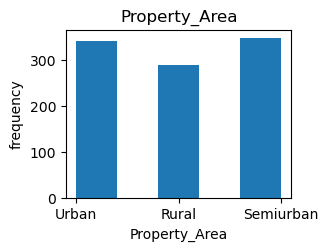

In [12]:
fig=plt.figure()
ax=fig.add_subplot(2,2,2)
ax.hist(data['Property_Area'], bins=5)
plt.title('Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('frequency')
plt.show()

#### Most of the applicants are from the semi-urban area

In [13]:
# continous variable
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.000000,981.000000,954.000000
mean,5179.795107,1601.916330,142.511530
std,5695.104533,2718.772806,77.421743
min,0.000000,0.000000,9.000000
25%,2875.000000,0.000000,100.000000
50%,3800.000000,1110.000000,126.000000
75%,5516.000000,2365.000000,162.000000
max,81000.000000,41667.000000,700.000000


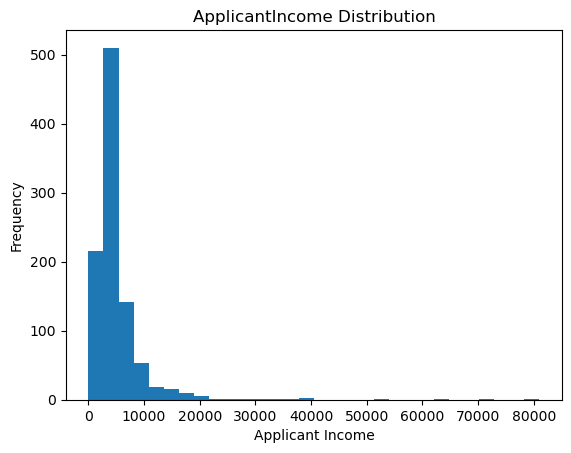

In [14]:
# the ApplicantIncome distribution is right skewed 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['ApplicantIncome'], bins=30)
plt.title('ApplicantIncome Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

#### Income distribution is very skewed, so most the people have an income below 40000

#### People with income above 40000 are rare

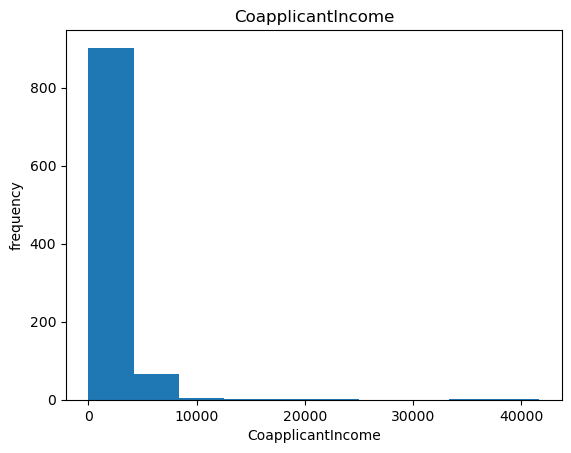

In [15]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['CoapplicantIncome'], bins=10)
plt.title('CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('frequency')
plt.show()

#### In the Coapplication Income data, we notice that a lot of applicants have no Co-applicants:

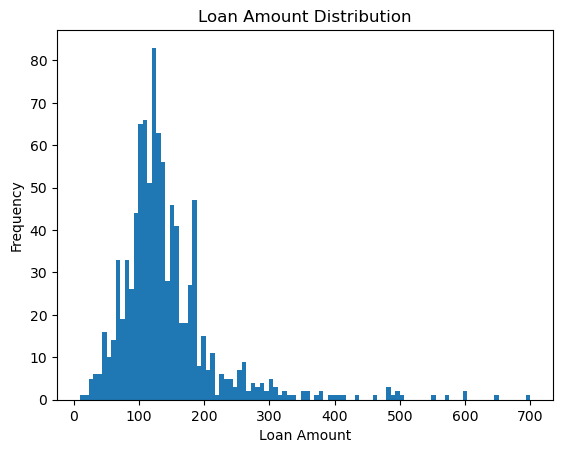

In [16]:
# the LoanAmount distribution is right skewed 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['LoanAmount'], bins=100)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### checking Null values

In [17]:
data.isna().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

## Fill Null values with mode

In [18]:
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])

In [19]:
data['Married']=data['Married'].fillna(data["Married"].mode()[0])

In [20]:
data['Dependents']=data['Dependents'].fillna(data["Dependents"].mode()[0])

In [21]:
data['Self_Employed']=data['Self_Employed'].fillna(data["Self_Employed"].mode()[0])

In [22]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data["Loan_Amount_Term"].mode()[0])

In [23]:
data['Credit_History']=data['Credit_History'].fillna(data["Credit_History"].mode()[0])

### Boxplot of Loan Amount Distribution to Identify Potential Outliers

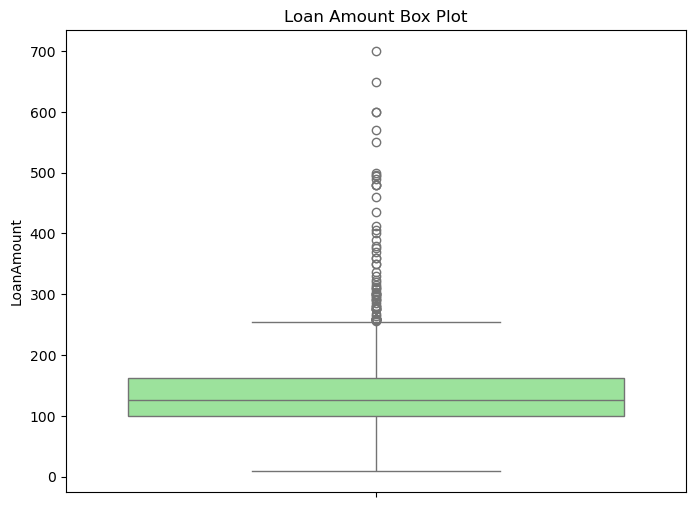

In [24]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data['LoanAmount'].dropna(), color='lightgreen')
plt.title('Loan Amount Box Plot')
plt.show()

#### "Handling Missing Values in Loan Amount: Filling Null Values with Median Due to Presence of Outliers"

In [25]:
data['LoanAmount']=data['LoanAmount'].fillna(data["LoanAmount"].median())

In [26]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


### Checking outliers

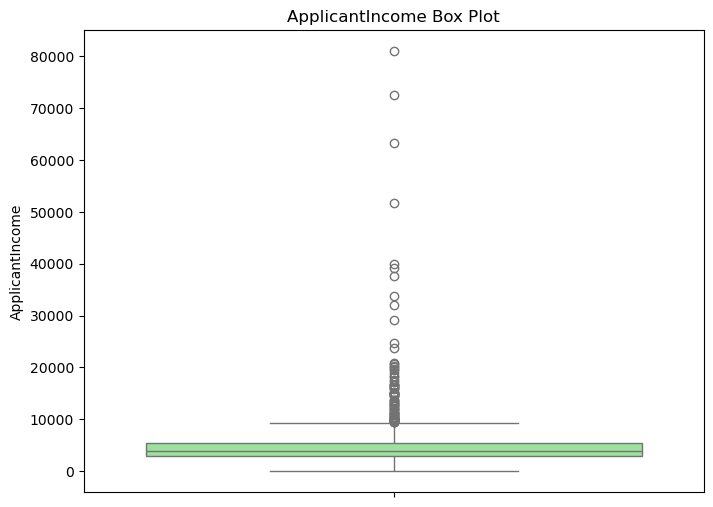

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['ApplicantIncome'].dropna(), color='lightgreen')
plt.title('ApplicantIncome Box Plot')
plt.show()

In [28]:
IQR_app_income = data.ApplicantIncome.quantile(0.75) - data.ApplicantIncome.quantile(0.25)
upper_limit_app_income = data.ApplicantIncome.quantile(0.75) + (IQR_app_income*1.5)
lower_limit_app_income = data.ApplicantIncome.quantile(0.25) - (IQR_app_income*1.5)
upper_limit_app_income, lower_limit_app_income

(9477.5, -1086.5)

In [29]:
outlier_count_app_income= len(data[(data['ApplicantIncome'] > upper_limit_app_income)])+len(data[(data['ApplicantIncome'] < lower_limit_app_income)])
outlier_count_app_income

84

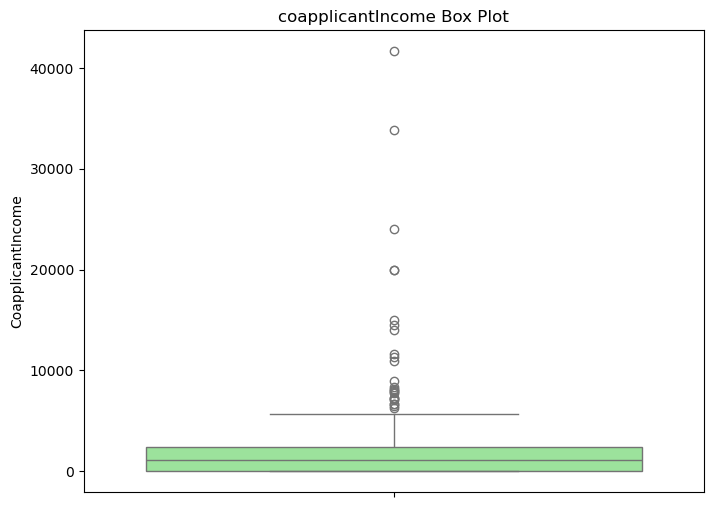

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['CoapplicantIncome'].dropna(), color='lightgreen')
plt.title('coapplicantIncome Box Plot')
plt.show()

In [31]:
IQR_coapp_income = data.CoapplicantIncome.quantile(0.75) - data.CoapplicantIncome.quantile(0.25)
upper_limit_coapp_income = data.CoapplicantIncome.quantile(0.75) + (IQR_coapp_income*1.5)
lower_limit_coapp_income = data.CoapplicantIncome.quantile(0.25) - (IQR_coapp_income*1.5)
upper_limit_coapp_income, lower_limit_coapp_income

(5912.5, -3547.5)

In [32]:
outlier_count_coapp = len(data[(data['CoapplicantIncome'] > upper_limit_coapp_income)])+len(data[(data['CoapplicantIncome'] < lower_limit_coapp_income)])
outlier_count_coapp

26

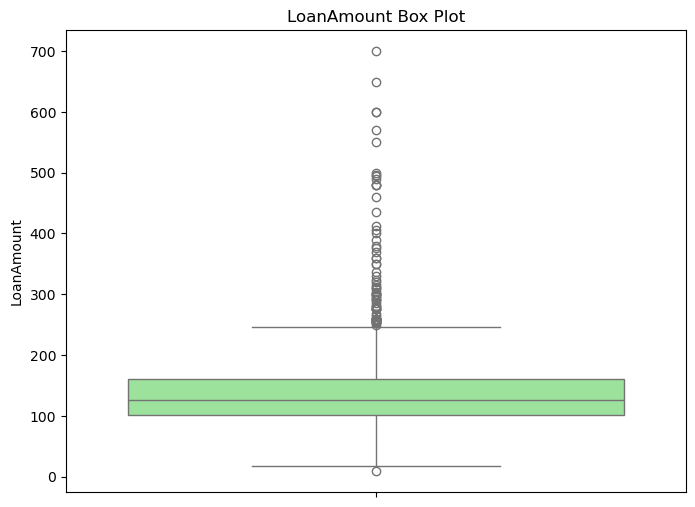

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['LoanAmount'].dropna(), color='lightgreen')
plt.title('LoanAmount Box Plot')
plt.show()

In [34]:
IQR_loanAmt = data.LoanAmount.quantile(0.75) - data.LoanAmount.quantile(0.25)
upper_limit_loanAmt = data.LoanAmount.quantile(0.75) + (IQR_loanAmt*1.5)
lower_limit_loanAmt = data.LoanAmount.quantile(0.25) - (IQR_loanAmt*1.5)
upper_limit_loanAmt, lower_limit_loanAmt

(248.5, 12.5)

In [35]:
outlier_count_loanAmt = len(data[(data['LoanAmount'] > upper_limit_loanAmt)])+len(data[(data['LoanAmount'] < lower_limit_loanAmt)])
outlier_count_loanAmt

72

### Variables with outliers:

#### ApplicantIncome (84 outliers exceeding its maximum value)
#### CoapplicantIncome ( 26 outliers exceeding its maximum value)
#### LoanAmount (72 outliers exceeding its maximum value)
#### where "Maximum" refers to 75th Percentile + 1.5 $$(Interqartile Range)*

### Treating Outliers

#### Log Transformation

In [36]:
data['ApplicantIncome'] = np.log1p(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
data['LoanAmount'] = np.log1p(data['LoanAmount'])

### Preprocessing

In [37]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [39]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [40]:
data['Dependents']=data['Dependents'].map({'1':1,'0':0,'2':2,'3+':4})

In [41]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
data['Married']=data['Married'].map({'Yes':1,'No':0})

In [43]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [44]:
data['Education']=data['Education'].map({'Not Graduate':0,'Graduate':1})

In [45]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
data['Self_Employed']=data['Self_Employed'].map({'No':0,'Yes':1})

In [47]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [48]:
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})

In [49]:
data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

### Feature Selection

## Bivariate Analysis¶

#### Categorical and Categorical

#### Loan_Status and Gender

In [50]:
tbl_gender= pd.crosstab(index = data['Loan_Status'], columns = data['Gender'])
tbl_gender.index = ['Not Approved','Approved']
tbl_gender

Gender,0,1
Not Approved,37,155
Approved,75,347


## Pearson's Chi-square Test

#### The chi-square test statistic for a test of independence of two categorical variables is as follows:
#### χ2=∑(O−E)2/E, Where O is the observed frequency and E is the expected frequency
 
#### H0:There is no relationship between LoanStatus and Gender
#### H1:There is a significant relation between the two
 
#### Calculated chi-square value (orginal frequency table excluding missing values)

#### The calculated χ2 value is 0.2369751, where the degree of freedom is 1. The critical value of the χ2 distribution with df of 1 is 3.841.

#### Hence:

#### criticalvalueofχ2>=calculatedvalueofχ2
#### Therefore H0 is Accepted

In [51]:
# performing the test using Python
# frequency table without missing values
stat, p, dof, expected = chi2_contingency(tbl_gender)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 0.7391461310869638
Independent (H_0 holds true)


In [52]:
tbl_marrd = pd.crosstab(index = data['Loan_Status'], columns = data['Married'])
tbl_marrd.index = ['Not Approved','Approved']
tbl_marrd.columns = ['Not Married','Married']
tbl_marrd

,Not Married,Married
Not Approved,79,113
Approved,134,288


### H0:There is no relationship between Loan Status and Married
### H1:NegationofH0

In [53]:
stat, p, dof, exptected = chi2_contingency(tbl_marrd)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 0.029608580862582116
Dependent (reject H_0)


In [54]:
tbl_education = pd.crosstab(data['Loan_Status'],data['Education'])
tbl_education.index = ['Not Approved','Approved']
tbl_education

Education,0,1
Not Approved,52,140
Approved,82,340


### H0:There is no relationship between Loan Status and Education
### H1:NegationofH0

In [55]:
stat, p, dof, exptected = chi2_contingency(tbl_education)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 0.04309962129357355
Dependent (reject H_0)


In [56]:
tbl_emp = pd.crosstab(index = data['Loan_Status'], columns = data['Self_Employed'])
tbl_emp.index = ['Not Approved','Approved']
tbl_emp

Self_Employed,0,1
Not Approved,166,26
Approved,366,56


### H0:There is no relationship between Loan Status and Self employed
### H1:NegationofH0

In [57]:
stat, p, dof, expected = chi2_contingency(tbl_emp)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 1.0
Independent (H_0 holds true)


In [58]:
tbl_termamount = pd.crosstab(index = data['Loan_Status'], columns = data['Loan_Amount_Term'])
tbl_termamount.index = ['Not Approved','Approved']
tbl_termamount

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Not Approved,0,2,0,1,0,15,1,5,159,9
Approved,1,0,2,3,3,29,3,8,367,6


### H0:There is no relationship between Loan Status and Term amount
### H1:NegationofH0

In [59]:
stat, p, dof, exptected = chi2_contingency(tbl_termamount)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 0.13058516348934335
Independent (H_0 holds true)


In [60]:
tbl_crt_histry= pd.crosstab(index = data['Loan_Status'], columns = data['Credit_History'])
tbl_crt_histryindex = ['Not Approved','Approved']
tbl_crt_histry.columns = ['Guidelines Not Met', 'Guidelines Met'] 
tbl_crt_histry

,Guidelines Not Met,Guidelines Met
Loan_Status,,
N,82,110
Y,7,415


### H0:There is no relationship between Loan Status and Credit history
### H1:NegationofH0

In [61]:
stat, p, dof, expected = chi2_contingency(tbl_crt_histry)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 3.4183499979091188e-40
Dependent (reject H_0)


In [62]:
tbl_area = pd.crosstab(index = data['Loan_Status'], columns = data['Property_Area'])
tbl_area.index = ['Not Approved','Approved']
tbl_area

Property_Area,0,1,2
Not Approved,69,69,54
Approved,110,133,179


### H0:There is no relationship between Loan Status and Property area
### H1:NegationofH0

In [63]:
stat, p, dof, exptected = chi2_contingency(tbl_area)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H_0)')
else:
    print('Independent (H_0 holds true)')

p value is 0.0021360187811644937
Dependent (reject H_0)


### Categorical and Continuous

In [64]:
data['ApplicantIncome'].groupby(data['Loan_Status']).describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,192.0,8.331039,0.678731,5.017280,7.967624,8.251756,8.676196,11.302217
Y,422.0,8.346274,0.629880,5.351858,7.965024,8.246303,8.660857,11.056241


In [65]:
# data set of Loan_Status Not Approved
tbl_Not_app = data[(data['Loan_Status'] == 'N')]
tbl_Not_app = tbl_Not_app['ApplicantIncome']
tbl_Not_app

1      8.430327
7      8.018625
9      9.460476
13     7.525101
17     8.163656
         ...   
596    8.761550
597    8.002360
600    6.033086
605    7.783641
613    8.430327
Name: ApplicantIncome, Length: 192, dtype: float64

In [66]:
tbl_app = data[(data['Loan_Status'] == 'Y')]
tbl_app = tbl_app['ApplicantIncome']
tbl_app

0      8.674197
2      8.006701
3      7.857094
4      8.699681
5      8.597482
         ...   
608    8.081166
609    7.972811
610    8.320448
611    8.996280
612    8.933796
Name: ApplicantIncome, Length: 422, dtype: float64

### Two sample Z-Test (ApplicantIncome splitted by Loan_Status)

### H0:μNincome=μYincomeH1:NegationofH0
### Assuming two levels of samples are independent.

### Conclusion:

#### There is no evidence that the difference in Applicant income will have an impact on loan eligibility.

In [67]:
ztest, pval = stests.ztest(tbl_Not_app,tbl_app,value = 0, alternative = 'two-sided')
alpha = 0.05
print("p value is " + str(pval))
if pval <= alpha:
    print('Two population means are not equal (reject H_0)')
else:
    print('Two population means are equal (H_0 holds true)')

p value is 0.7863017640744088
Two population means are equal (H_0 holds true)


### Loan amount v/s Loan status

In [68]:
data['LoanAmount'].groupby(data['Loan_Status']).describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,192.0,4.893000,0.498360,2.302585,4.641975,4.848109,5.159055,6.347389
Y,422.0,4.853034,0.487443,2.890372,4.615121,4.844187,5.081404,6.552508


In [69]:
# Separate data by Loan_Status
tbl_Not_app_loan = data[data['Loan_Status'] == 'N']['LoanAmount'].dropna()
tbl_app_loan = data[data['Loan_Status'] == 'Y']['LoanAmount'].dropna()

# Perform two-sample t-test
t_stat_loan, pval_loan = stats.ttest_ind(tbl_Not_app_loan, tbl_app_loan, equal_var=False)
print("p-value for LoanAmount:", pval_loan)
if pval_loan <= alpha:
    print('Two population means are not equal for LoanAmount (reject H_0)')
else:
    print('Two population means are equal for LoanAmount (H_0 holds true)')


NameError: name 'stats' is not defined

### coapplicant income v/s loan status

In [70]:
import scipy.stats as stats

# Separate data by Loan_Status
tbl_Not_app_co = data[data['Loan_Status'] == 'N']['CoapplicantIncome'].dropna()
tbl_app_co = data[data['Loan_Status'] == 'Y']['CoapplicantIncome'].dropna()

# Perform two-sample t-test
t_stat_co, pval_co = stats.ttest_ind(tbl_Not_app_co, tbl_app_co, equal_var=False)
print("p-value for CoapplicantIncome:", pval_co)
if pval_co <= alpha:
    print('Two population means are not equal for CoapplicantIncome (reject H_0)')
else:
    print('Two population means are equal for CoapplicantIncome (H_0 holds true)')


p-value for CoapplicantIncome: 0.1401054427687274
Two population means are equal for CoapplicantIncome (H_0 holds true)


In [71]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [72]:
# Drop the less important categorical features
data= data.drop(columns=['Gender', 'Education', 'Self_Employed'])

In [73]:
data.isna().sum()

Married                0
Dependents             0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

### Fill null values in the Target variable by using a predicted model

In [74]:
# Step 1: Split Data
train_data = data[data['Loan_Status'].notnull()]
predict_data = data[data['Loan_Status'].isnull()]

X_train = train_data.drop(columns='Loan_Status')
y_train = train_data['Loan_Status']



In [75]:
X_predict = predict_data.drop(columns='Loan_Status')

In [76]:
# Step 3: Train a Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# Step 4: Predict Missing Values
predicted_values = model.predict(X_predict)

In [78]:
predicted_values

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [79]:
# Step 5: Combine Data
data.loc[data['Loan_Status'].isnull(), 'Loan_Status'] = predicted_values

In [80]:
data

,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,8.674197,0.000000,4.844187,360.0,1.0,1,Y
1,1,1,8.430327,7.319202,4.859812,360.0,1.0,0,N
2,1,0,8.006701,0.000000,4.204693,360.0,1.0,1,Y
3,1,0,7.857094,7.765993,4.795791,360.0,1.0,1,Y
4,0,0,8.699681,0.000000,4.955827,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...
976,1,4,8.296547,7.483244,4.736198,360.0,1.0,1,Y
977,1,0,8.333030,6.565265,4.753590,360.0,1.0,1,Y
978,0,0,8.086718,7.597898,4.844187,360.0,1.0,2,Y
979,1,0,8.517393,7.780721,5.068904,360.0,1.0,0,Y


In [81]:
data.isna().sum()

Married              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [83]:
data.isna().sum()

Married              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
from sklearn.tree import DecisionTreeRegressor 

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
from sklearn.svm import SVC

In [89]:
from sklearn.model_selection import KFold,StratifiedKFold

In [90]:
 fold=StratifiedKFold(n_splits=5)

In [91]:
type(x)

pandas.core.frame.DataFrame

In [92]:
x=np.array(x)
y=np.array(y)

### K-Fold validation

In [93]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)
log_score=[]
svm_score=[]
rf_score=[]
dt_score=[]
knn_score=[]

for train_index,test_index in fold.split(x,y):
    x_train,x_test,y_train,y_test=x[train_index],x[test_index],y[train_index],y[test_index]
    log_score.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
    svm_score.append(get_score(SVC(),x_train,x_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=10),x_train,x_test,y_train,y_test))
    dt_score.append(get_score(DecisionTreeClassifier(random_state=10),x_train,x_test,y_train,y_test))
    knn_score.append(get_score(KNeighborsClassifier(n_neighbors=9),x_train,x_test,y_train,y_test))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [94]:
log_score

[0.8223350253807107,
 0.8163265306122449,
 0.8622448979591837,
 0.8979591836734694,
 0.9387755102040817]

In [95]:
svm_score

[0.7309644670050761,
 0.7346938775510204,
 0.7346938775510204,
 0.7346938775510204,
 0.7295918367346939]

In [96]:
rf_score

[0.8274111675126904,
 0.826530612244898,
 0.8571428571428571,
 0.9132653061224489,
 0.9744897959183674]

In [97]:
dt_score

[0.8020304568527918,
 0.7346938775510204,
 0.7959183673469388,
 0.826530612244898,
 0.8418367346938775]

In [98]:
knn_score

[0.8020304568527918,
 0.7704081632653061,
 0.8010204081632653,
 0.826530612244898,
 0.8673469387755102]

In [99]:
print(np.mean(log_score))
print(np.mean(svm_score))
print(np.mean(rf_score))
print(np.mean(dt_score))
print(np.mean(knn_score))

0.8675282295659381
0.7329275872785661
0.8797679477882525
0.8002020097379052
0.8134673158603544


#### Random Forest giving the best accuracy

In [100]:
len(x)

981

In [101]:
len(y)

981

In [102]:
len(x_train)

785

In [103]:
len(x_test)

196

In [104]:
len(y_train)

785

In [105]:
len(y_test)

196

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [107]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [108]:
model.score(x_test,y_test)

0.8271186440677966

In [110]:
import pickle
pickle_out=open('loan_model.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()